In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
outputdir = "/home/francisco/GitHub/DQN-Event-Summarization/data/cnn_tokenized/"
filepath = "/home/francisco/GitHub/DQN-Event-Summarization/data/cnn_tokenized/cnn_trainingstreams_tokenized.csv"

In [3]:
findf = pd.read_csv(filepath)

In [4]:
findf.head()

,query_id,sentence_idx,query,sentence,true_summary,stokens,tstokens,qtokens
0,0,0,Mistaken for your child s grandmother,i m 45 and my son is 7,i m 45 and my son is 7 once in a while i still...,0 1 2 3 4 5 6 7,0 1 2 3 4 5 6 7 20001 8 9 10 0 11 12 13 14 0 2...,20001 102 33 149 105 48
1,0,1,Mistaken for your child s grandmother,once in a while i still get carded when i try ...,i m 45 and my son is 7 once in a while i still...,20001 8 9 10 0 11 12 13 14 0 20001 15 16 17 18...,0 1 2 3 4 5 6 7 20001 8 9 10 0 11 12 13 14 0 2...,20001 102 33 149 105 48
2,0,2,Mistaken for your child s grandmother,i was 38 when Dominican Republic Emergency Ope...,i m 45 and my son is 7 once in a while i still...,0 23 51 14 52 53 54 55 56 23 57 58 59 9 60 61 ...,0 1 2 3 4 5 6 7 20001 8 9 10 0 11 12 13 14 0 2...,20001 102 33 149 105 48
3,0,3,Mistaken for your child s grandmother,both incidents took place after i moved from A...,i m 45 and my son is 7 once in a while i still...,68 69 70 71 72 0 73 74 75 76 77 15 78 79 80 81...,0 1 2 3 4 5 6 7 20001 8 9 10 0 11 12 13 14 0 2...,20001 102 33 149 105 48
4,0,4,Mistaken for your child s grandmother,i thought about the incidents when i read a re...,i m 45 and my son is 7 once in a while i still...,0 94 90 37 69 14 0 95 9 26 78 79 96 20001 97 9...,0 1 2 3 4 5 6 7 20001 8 9 10 0 11 12 13 14 0 2...,20001 102 33 149 105 48


In [5]:
min_idx, max_idx = findf['sentence_idx'].min(), findf['sentence_idx'].max()

In [6]:
#cols = ['sentence_idx', 'query_id', 'qtokens', 'stokens', 'tstokens']
qdfm = findf[['query_id', 'qtokens', 'tstokens']].groupby(['query_id', 'qtokens', 'tstokens']).size().reset_index().rename(columns={0:'n_sentences'})

In [7]:
qdfm.head()

,query_id,qtokens,tstokens,n_sentences
0,0,20001 102 33 149 105 48,0 1 2 3 4 5 6 7 20001 8 9 10 0 11 12 13 14 0 2...,122
1,1,20001 102 319 550 551 19316 549 553 566,78 79 549 411 550 44 551 552 549 84 553 20001 ...,72
2,2,690 691 3 19317 591 20001 37 1510,37 549 788 41 20001 756 8 78 79 572 808 809 81...,98
3,3,690 1289 19318 747 15 886 1170 1171 99 20001 837,78 79 549 280 1168 105 1169 37 78 79 572 538 8...,62
4,4,19319 1398 46 1385 5599 1430 8 14494 20001,78 79 549 139 1380 1381 318 9 1382 1383 8 1384...,60


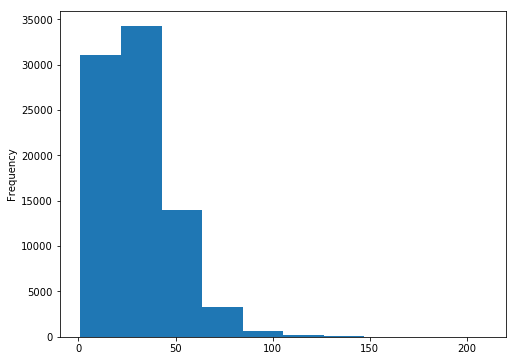

In [8]:
qdfm['n_sentences'].plot(kind='hist', figsize=(8, 6))

In [9]:
qdfm.drop('n_sentences', inplace=True, axis=1)

In [10]:
for idx in range(min_idx, max_idx + 1):
    findf_ssidx = findf[findf['sentence_idx'] == idx].copy()
    findf_ssidx.drop_duplicates(inplace=True)
    if idx == 0 :
        qdfout = qdfm.merge(findf_ssidx[['query_id', 'stokens']], 
            how='left', on=['query_id']
        ) 
    else:
        qdfout = qdfout.merge(findf_ssidx[['query_id', 'stokens']], 
            how='left', on=['query_id']
        ) 
        
    qdfout.columns = qdfout.columns[:(3 + idx) ].tolist() + ['stokens_%i' % idx]

In [11]:
qdfout.head()

,query_id,qtokens,tstokens,stokens_0,stokens_1,stokens_2,stokens_3,stokens_4,stokens_5,stokens_6,...,stokens_115,stokens_116,stokens_117,stokens_118,stokens_119,stokens_120,stokens_121,stokens_122,stokens_123,stokens_124
0,0,20001 102 33 149 105 48,0 1 2 3 4 5 6 7 20001 8 9 10 0 11 12 13 14 0 2...,0 1 2 3 4 5 6 7,20001 8 9 10 0 11 12 13 14 0 20001 15 16 17 18...,0 23 51 14 52 53 54 55 56 23 57 58 59 9 60 61 ...,68 69 70 71 72 0 73 74 75 76 77 15 78 79 80 81...,0 94 90 37 69 14 0 95 9 26 78 79 96 20001 97 9...,37 96 107 108 15 109 4 20001 110 101 48 111 99...,123 0 124 125 126 127 128 129 4 130 131 37 132...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20001 102 319 550 551 19316 549 553 566,78 79 549 411 550 44 551 552 549 84 553 20001 ...,78 79 549 411 550 44 551 552 549 84 553 20001 ...,37 561 102 562 3 563 564 565 8 37 20001 23 566...,37 558 102 551 84 570 571 572 23 573 74 337 26...,394 84 570 574 56 105 558 20001 74 575 271 15 ...,84 582 583 82 83 551 582 583 584 110 585 3 586...,37 595 20001 32 37 553 596 161 202 302 302 315...,112 574 56 3 603 604 605 606 72 607 298 32 196...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,690 691 3 19317 591 20001 37 1510,37 549 788 41 20001 756 8 78 79 572 808 809 81...,37 549 788 41 20001 756 8 78 79 572,37 789 110 37 579 790 791 105 792 153 793 794 ...,808 809 810 811 627 812 32 78 79 572 6 8 253 8...,8 822 68 110 339 823 824 37 825 826 827 110 78...,8 822 37 831 832 833 826 827 238 808 809 810 8...,834 78 79 572 835 37 35 836 837 110 253 838 3 ...,843 46 126 46 269 271 110 78 79 572 105 624 13...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,690 1289 19318 747 15 886 1170 1171 99 20001 837,78 79 549 280 1168 105 1169 37 78 79 572 538 8...,78 79 549 280 1168 105 1169 37 78 79 572 538 8...,37 1171 538 1179 71 280 284 9 1 1180 99 1172 9...,1185 1187 37 1188 1189 627 248 20001 1190 318 ...,1194 1195 507 9 551 1196 1188 1197 430 8 37 11...,153 105 9 720 720 1208 889 9 837 889 507 1209 ...,248 6 14 37 78 79 572 591 67 35 1211,37 551 1188 1212 1213 3 1184 15 37 799 800 801...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,19319 1398 46 1385 5599 1430 8 14494 20001,78 79 549 139 1380 1381 318 9 1382 1383 8 1384...,78 79 549 139 1380 1381 318 9 1382 1383 8 1384...,9 1390 1391 869 8 1185 1392 1393 609 1394 223 ...,852 8 37 1397 316 1398,37 574 56 869 8 578 3 579 580 1399 15 90 7 140...,37 869 23 1405 896 37 1406 1407 110 1408 1409 ...,455 99 37 1414 1415 316 1036 15 1416 1333 14 1...,37 869 123 1421 280 1034 1422 852 218 15 37 80...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
qdfout.to_csv(
        os.path.join(outputdir, 'cnn_data_corpus.csv'), 
    index=False
)